<a href="https://colab.research.google.com/github/Nargis45/Regression-techniques/blob/master/Multivariate_linear_Regression(AB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
#providing the path of the file and storing the data in dataset and pandas library is used to study the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/50_Startups.csv')

In [46]:
len(df)

50

In [47]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [48]:
df.shape

(50, 5)

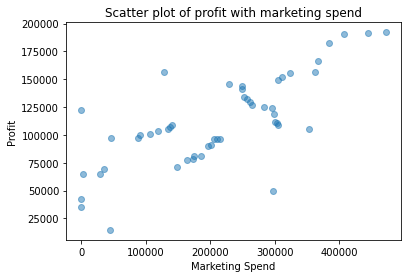

In [49]:
plt.scatter(df['Marketing Spend'], df['Profit'], alpha=0.5)
plt.title('Scatter plot of profit with marketing spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

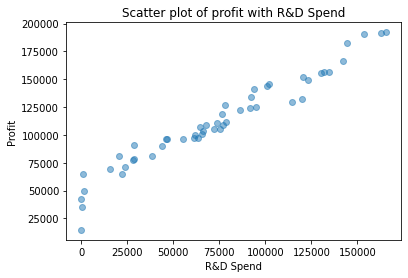

In [50]:
plt.scatter(df['R&D Spend'], df['Profit'], alpha=0.5)
plt.title('Scatter plot of profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

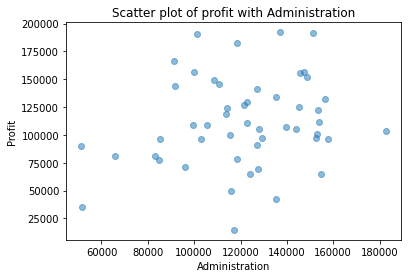

In [51]:
plt.scatter(df['Administration'], df['Profit'], alpha=0.5)
plt.title('Scatter plot of profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

In [52]:
ax=df.groupby(df['State'])['Profit'].mean()

In [53]:
ax

State
California    103905.175294
Florida       118774.024375
New York      113756.446471
Name: Profit, dtype: float64

Text(0, 0.5, 'Profit')

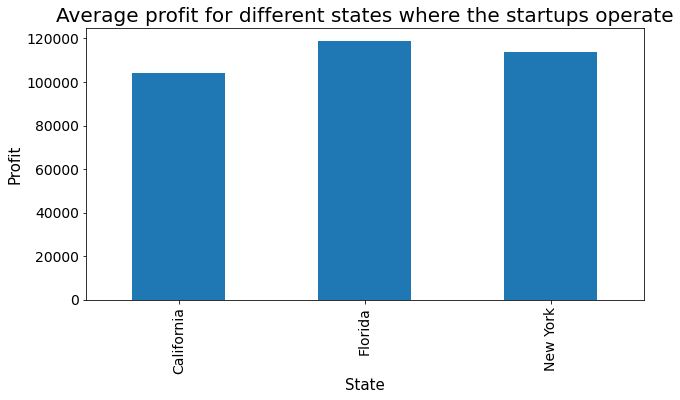

In [54]:
ax=df.groupby(df['State'])['Profit'].mean().plot.bar(
    figsize=(10, 5),
    fontsize=14
)
ax.set_title("Average profit for different states where the startups operate", fontsize=20)
ax.set_xlabel('State', fontsize=15)
ax.set_ylabel('Profit', fontsize=15)

In [55]:
df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [56]:
#one hot encoding
#create dummy variables for categorical variable state
df['NewYork_state']=np.where(df['State']=='New York',1,0)
df['California_state']=np.where(df['State']=='California',1,0)
df['Florida_state']=np.where(df['State']=='Florida',1,0)

In [57]:
df.drop(columns=['State'], axis=1, inplace=True)

In [58]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_state,California_state,Florida_state
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [59]:
dependent_variable='Profit'

In [62]:
independent_variable=list(set(df.columns.tolist())-{dependent_variable})

In [63]:
independent_variable

['Administration',
 'Marketing Spend',
 'NewYork_state',
 'R&D Spend',
 'Florida_state',
 'California_state']

In [72]:
X=df[independent_variable].values

In [73]:
y=df[dependent_variable].values

In [74]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [75]:
#transforming data
scaler=MinMaxScaler()

In [76]:
X_train=scaler.fit_transform(X_train)

In [77]:
X_test=scaler.transform(X_test)

In [78]:
X_train[0:10]

array([[0.48655174, 0.45494286, 0.        , 0.33561668, 1.        ,
        0.        ],
       [0.3173015 , 0.43561799, 1.        , 0.2782839 , 0.        ,
        0.        ],
       [0.87258866, 0.28413435, 0.        , 0.45557444, 1.        ,
        0.        ],
       [1.        , 0.44680961, 0.        , 0.2807759 , 0.        ,
        1.        ],
       [0.59103645, 0.62511553, 0.        , 0.55488118, 1.        ,
        0.        ],
       [0.88568959, 0.68649342, 0.        , 0.7880179 , 1.        ,
        0.        ],
       [0.98922572, 0.54370828, 0.        , 0.72539353, 1.        ,
        0.        ],
       [0.6847981 , 0.0040356 , 1.        , 0.0060492 , 0.        ,
        0.        ],
       [0.00432296, 0.        , 1.        , 0.00327821, 0.        ,
        0.        ],
       [0.95618996, 0.22709197, 1.        , 0.39676926, 0.        ,
        0.        ]])

In [79]:
regressor=LinearRegression()

In [80]:
regressor.fit(X_train, y_train)

LinearRegression()

In [81]:
regressor.intercept_

44153.9546678486

In [82]:
regressor.coef_

array([ 3.49927567e+03,  1.72720281e+04,  7.86007422e+02,  1.27892182e+05,
       -8.72645791e+02,  8.66383692e+01])

In [95]:
y_pred_train=regressor.predict(X_train)

In [84]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [85]:
y_pred=regressor.predict(X_test)

In [88]:
#predicted profit on test data
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [89]:
#actual profit on test data
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [90]:
mean_squared_error(y_test, y_pred)

83502864.03257746

In [97]:
#root mean squared error train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

9031.666612578969

In [96]:
#root mean squared error test performance
math.sqrt(mean_squared_error(y_test, y_pred))

9137.99015279495

In [98]:
r2_score(y_train, y_pred_train)

0.9501847627493607

In [94]:
r2_score(y_test, y_pred)

0.9347068473282424